In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
total_close = pd.read_csv('total_close.csv')

In [3]:
total_close = total_close.drop(['Unnamed: 0'],axis=1)

In [4]:
total_close['Date'] = pd.to_datetime(total_close.Date,format='%Y-%m-%d')
total_close.index = total_close['Date']

In [7]:
total_close

,Date,Close_icici,Close_hdfc,Close_axis,Close_sbi
Date,,,,,
2000-01-03,2000-01-03,13.7364,34.8800,5.18,24.27
2000-01-04,2000-01-04,13.3909,34.8000,5.38,25.97
2000-01-05,2000-01-05,12.6000,33.7000,5.24,24.87
2000-01-06,2000-01-06,12.5727,33.5000,5.11,25.90
2000-01-07,2000-01-07,12.0000,33.9000,4.86,27.89
...,...,...,...,...,...
2019-07-24,2019-07-24,408.5500,2279.8000,711.10,339.65
2019-07-25,2019-07-25,409.0500,2285.8000,723.30,341.40
2019-07-26,2019-07-26,415.5000,2276.3000,729.85,342.50


In [8]:
ts = total_close[['Close_icici','Close_hdfc','Close_axis','Close_sbi']]

In [9]:
total_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4633 entries, 2000-01-03 to 2019-07-30
Data columns (total 5 columns):
Date           4633 non-null datetime64[ns]
Close_icici    4633 non-null float64
Close_hdfc     4633 non-null float64
Close_axis     4633 non-null float64
Close_sbi      4633 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 217.2 KB


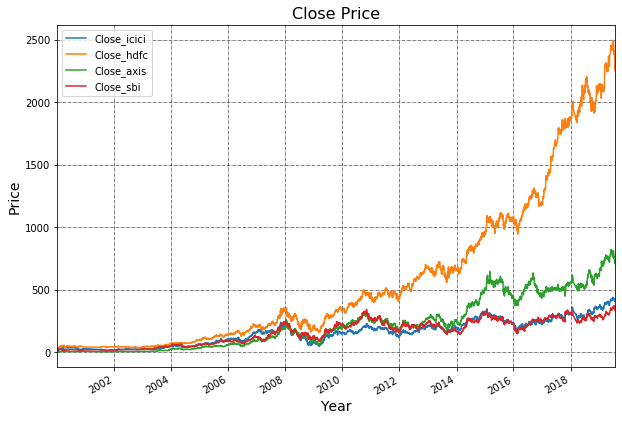

In [10]:
#Plotting the close prices for all 4
# Plot all the close prices
ts.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)


In [11]:
total_all = pd.read_csv('total.csv')

In [12]:
total_all =  total_all.drop(['Unnamed: 0'],axis=1)

In [13]:
total_all['Date'] = pd.to_datetime(total_all.Date,format='%Y-%m-%d')
total_all.index = total_all['Date']

In [14]:
ts1 = total_all[['Open_icici','Open_hdfc','Open_axis','Open_sbi']]

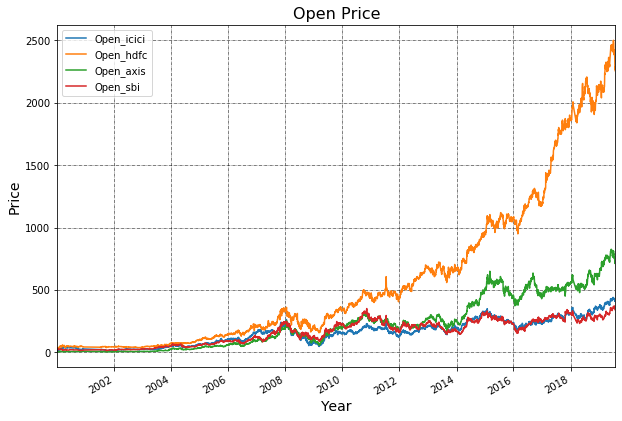

In [15]:
#Plotting the close prices for all 4
# Plot all the close prices
ts1.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Open Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)


In [19]:
#Calculate returns
total_close = total_close.drop(['Date'],axis=1)
retscomp = total_close.pct_change()


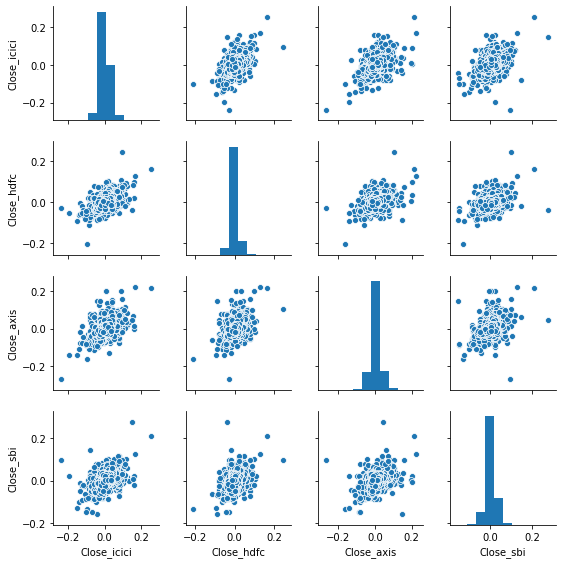

In [27]:
a =sns.pairplot(retscomp[1:],size=2)

In [28]:
#Worst Single day drop
retscomp.idxmin()

Close_icici   2001-07-02
Close_hdfc    2004-05-17
Close_axis    2001-07-02
Close_sbi     2000-07-24
dtype: datetime64[ns]

In [30]:
# Best Single Day Gain
retscomp.idxmax()

Close_icici   2009-05-18
Close_hdfc    2004-05-18
Close_axis    2008-10-13
Close_sbi     2017-10-25
dtype: datetime64[ns]

# Some links to the above dates

#https://economictimes.indiatimes.com/markets/stocks/news/sbi-grows-rs-61000-crore-bigger-in-a-day/articleshow/61233601.cms

# Wierldy HDFC's biggest drop and biggest gain was just one day apart

In [33]:
retscomp.std()

Close_icici    0.027665
Close_hdfc     0.019688
Close_axis     0.028203
Close_sbi      0.023709
dtype: float64

# Axis bank is the most riskiest while HDFC is the least

## Lets take the most recent year 2019 and see the risks

In [39]:
retscomp.loc['2019-01-01':'2019-08-23'].std()

Close_icici    0.016087
Close_hdfc     0.009590
Close_axis     0.015328
Close_sbi      0.016895
dtype: float64

## Overtime the risk of all banks has reduced 

In [31]:
#Risk-return trade off

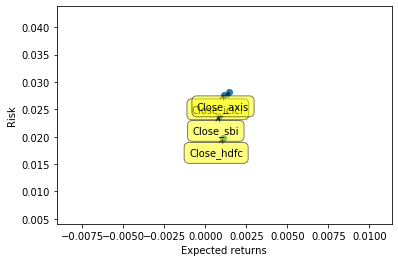

In [32]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [50]:
#Plotting Moving average for all 4
df1 = total_close['Close_icici']
df1 = pd.DataFrame(df1)
df1['MA_window_10'] = df1['Close_icici'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df1['MA_window_20'] = df1['Close_icici'].rolling(20).mean().shift()

In [46]:
df1

Date
2000-01-03     13.7364
2000-01-04     13.3909
2000-01-05     12.6000
2000-01-06     12.5727
2000-01-07     12.0000
                ...   
2019-07-24    408.5500
2019-07-25    409.0500
2019-07-26    415.5000
2019-07-29    429.3000
2019-07-30    424.9500
Name: Close_icici, Length: 4633, dtype: float64

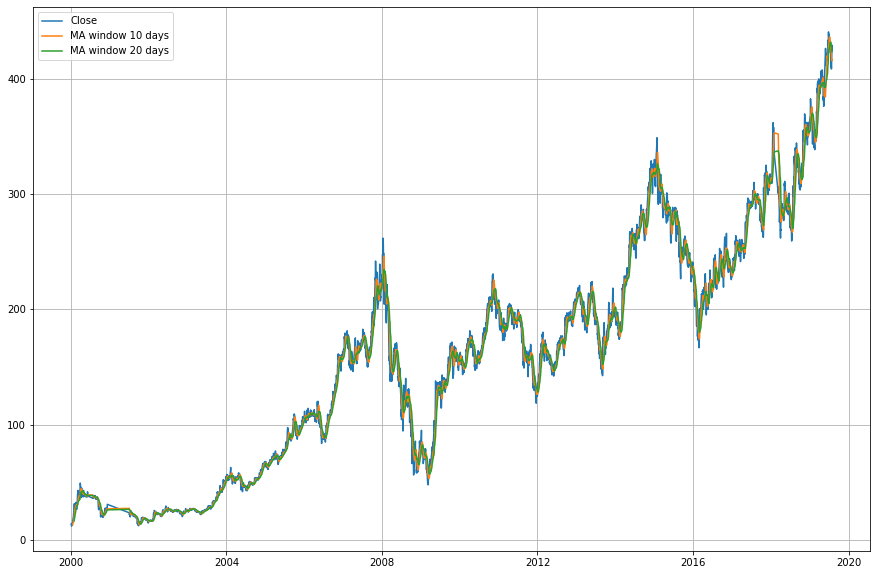

In [53]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df1['Close_icici'], label='Close')
plt.plot(df1['MA_window_10'], label='MA window 10 days')
plt.plot(df1['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [54]:
#Moving average for hdfc
df2 = total_close['Close_hdfc']
df2 = pd.DataFrame(df2)
df2['MA_window_10'] = df2['Close_hdfc'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df2['MA_window_20'] = df2['Close_hdfc'].rolling(20).mean().shift()

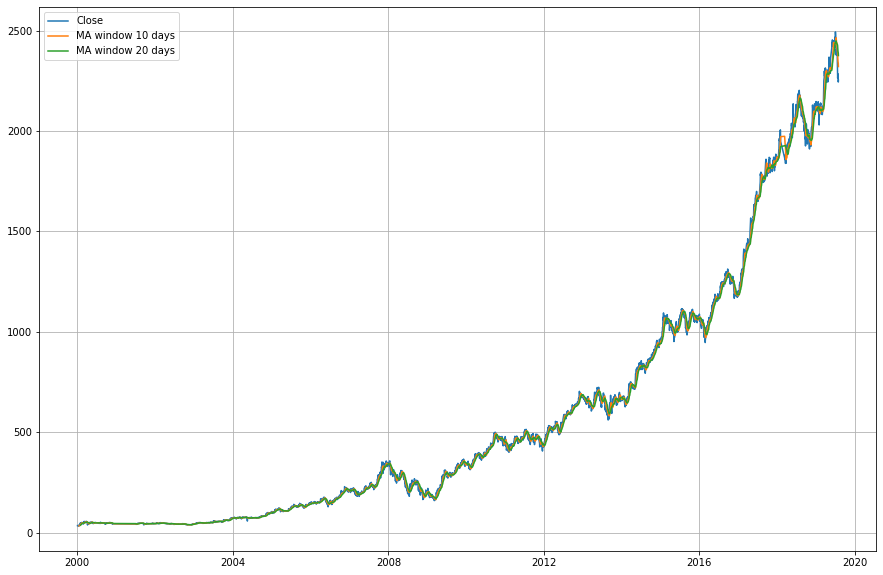

In [55]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df2['Close_hdfc'], label='Close')
plt.plot(df2['MA_window_10'], label='MA window 10 days')
plt.plot(df2['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [56]:
#Moving average for axis
df3 = total_close['Close_axis']
df3 = pd.DataFrame(df3)
df3['MA_window_10'] = df3['Close_axis'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df3['MA_window_20'] = df3['Close_axis'].rolling(20).mean().shift()

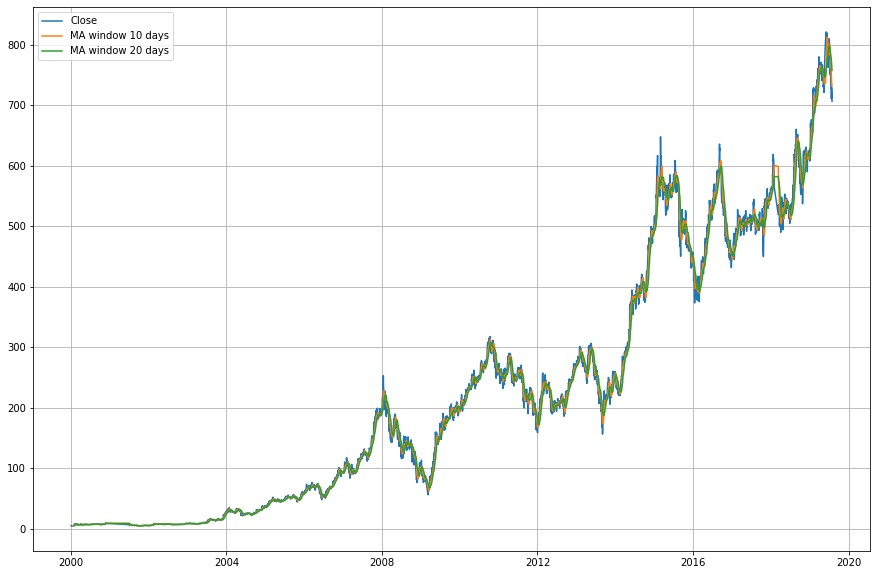

In [57]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df3['Close_axis'], label='Close')
plt.plot(df3['MA_window_10'], label='MA window 10 days')
plt.plot(df3['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [58]:
#Moving average for axis
df4 = total_close['Close_sbi']
df4 = pd.DataFrame(df4)
df4['MA_window_10'] = df4['Close_sbi'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df4['MA_window_20'] = df4['Close_sbi'].rolling(20).mean().shift()


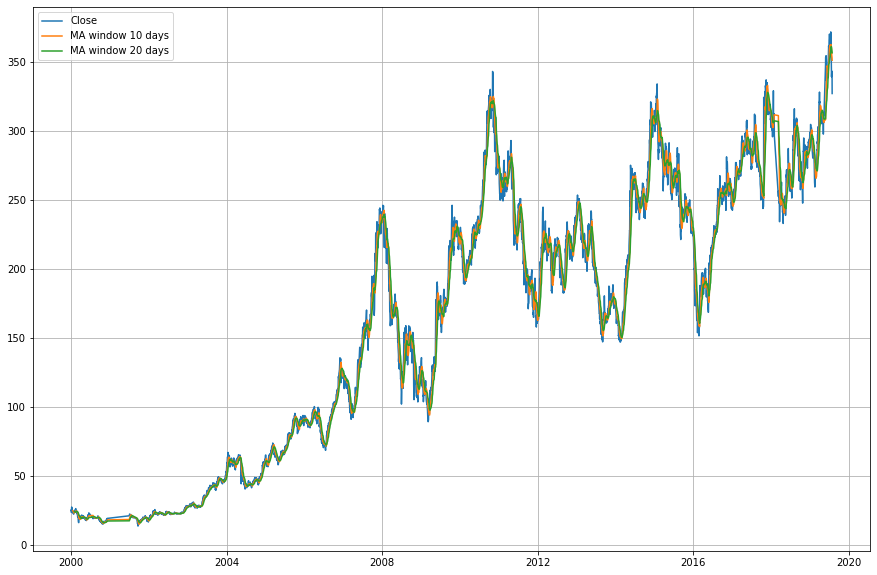

In [59]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df4['Close_sbi'], label='Close')
plt.plot(df4['MA_window_10'], label='MA window 10 days')
plt.plot(df4['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()